In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pylab
import seaborn as sns
import scipy as sc
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv('Bank_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
def null_ratio(df):
    data= [(col,df[col].isnull().sum()/len(df)*100)
           for col in df.columns if df[col].isnull().sum()>0]
    columns= ['col', 'ratio']
    missing_data= pd.DataFrame(data,columns=columns)
    pylab.rcParams["figure.figsize"]=(20,6)
    ax= missing_data.plot(kind='bar',x='col', y='ratio')
    ax.bar_label(ax.containers[0])

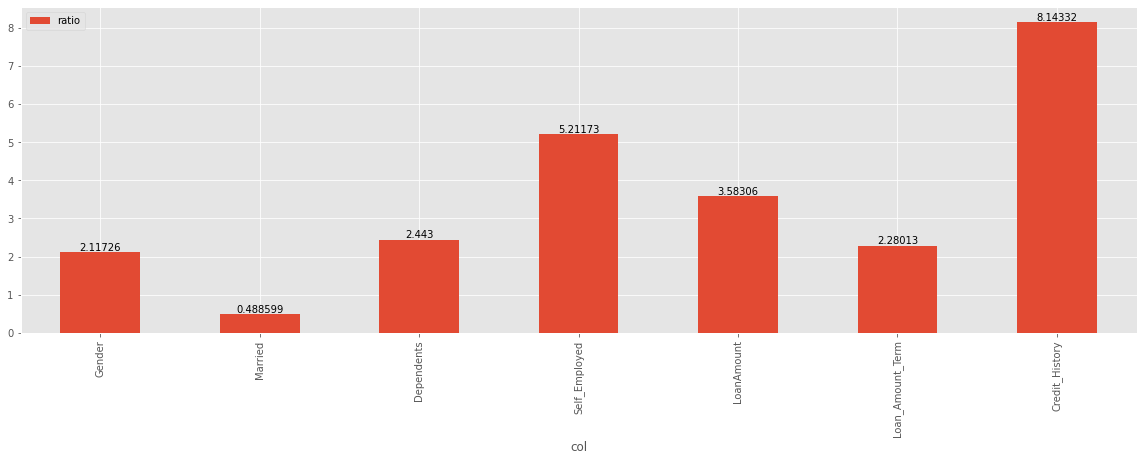

In [7]:
null_ratio(df)

In [8]:
for col in df.columns[1:]:
    if df.dtypes[col] == 'object':
        print('the number of unique values in {} is {} :'.format(col,df[col].nunique()))
        print('the unique values in {} is {} :'.format(col,df[col].unique()))
        print('---------------------------------------\n')

the number of unique values in Gender is 2 :
the unique values in Gender is ['Male' 'Female' nan] :
---------------------------------------

the number of unique values in Married is 2 :
the unique values in Married is ['No' 'Yes' nan] :
---------------------------------------

the number of unique values in Dependents is 4 :
the unique values in Dependents is ['0' '1' '2' '3+' nan] :
---------------------------------------

the number of unique values in Education is 2 :
the unique values in Education is ['Graduate' 'Not Graduate'] :
---------------------------------------

the number of unique values in Self_Employed is 2 :
the unique values in Self_Employed is ['No' 'Yes' nan] :
---------------------------------------

the number of unique values in Property_Area is 3 :
the unique values in Property_Area is ['Urban' 'Rural' 'Semiurban'] :
---------------------------------------

the number of unique values in Loan_Status is 2 :
the unique values in Loan_Status is ['Y' 'N'] :
-------

In [9]:
def pie_plot(col,explode):
    
    kwargs = dict(
        startangle = 90,
        colormap   = 'Pastel2',
        fontsize   = 13,
        explode    = explode,
        figsize    = (60,6),
        autopct    = '%1.1f%%',
        title      = 'count for {}'.format(col)
    )

    df[col].value_counts().plot.pie(**kwargs);

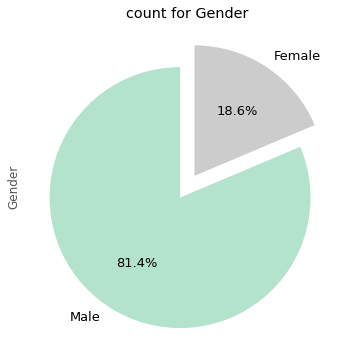

In [10]:
pie_plot('Gender',(0.1,0.1))

In [11]:
df_nan= df.copy()
df_nan.drop('Loan_ID',axis=1, inplace=True)

encoders = dict()

for col_name in df_nan.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df_nan[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index)
    
    encoders[col_name] = label_encoder

In [12]:
def null_values_pred(col):
    
    model= HistGradientBoostingClassifier()

    train= df_nan[df_nan[col].isnull()==False]
    test=df_nan[df_nan[col].isnull()==True]

    y= train[col]
    train.drop(col, axis=1, inplace=True)

    model.fit(train, y)
    test.drop(col, axis=1, inplace=True)

    pred= model.predict(test)

    test[col]= pred
    
    df_nan[col].fillna(test[col], inplace=True)
    print('unique values before imputing null values : {}'.format(df[col].unique()))
    
    df[col]= encoders[col].inverse_transform(df_nan[col].astype(int))
    print('unique values after imputing null values : {}'.format(df[col].unique()))

In [13]:
null_values_pred('Gender')

unique values before imputing null values : ['Male' 'Female' nan]
unique values after imputing null values : ['Male' 'Female']


In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


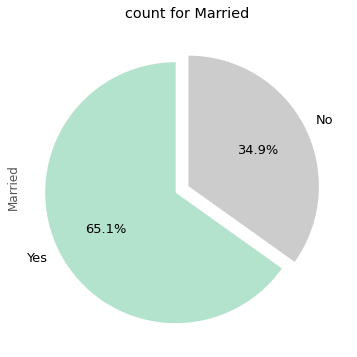

In [15]:
pie_plot('Married',(0.1,0.01))

In [16]:
null_values_pred('Married')

unique values before imputing null values : ['No' 'Yes' nan]
unique values after imputing null values : ['No' 'Yes']


In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
# df['Dependents']= df['Dependents'].astype(str).apply(lambda x: x.split('+')[0])

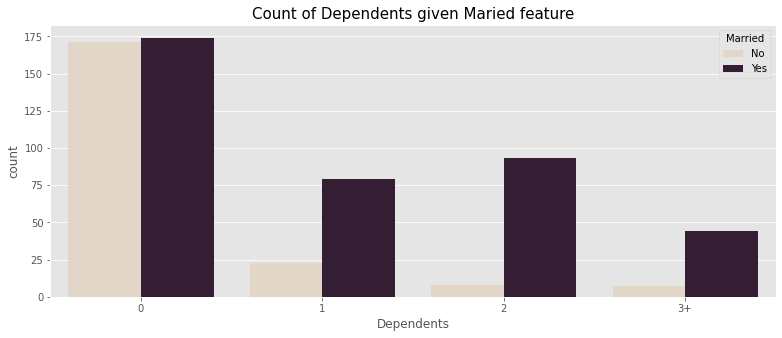

In [19]:
fig, ax= plt.subplots(nrows=1,ncols=1, figsize=(13,5))

sns.countplot(data=df, x='Dependents',hue='Married', palette="ch:.25")
ax.set_title('Count of Dependents given Maried feature', fontsize= 15);

In [20]:
df['Dependents'] = np.where(
   (df['Dependents'].isnull() == True) & (df['Married'] == 'No') ,'0', df['Dependents']
   )

df['Dependents'] = np.where(
   (df['Dependents'].isnull() == True) ,'2', df['Dependents']
   )

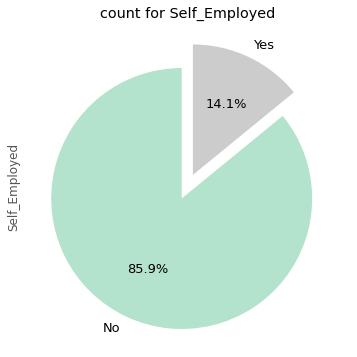

In [21]:
pie_plot('Self_Employed', (0.1,0.1))

In [22]:
null_values_pred('Self_Employed')

unique values before imputing null values : ['No' 'Yes' nan]
unique values after imputing null values : ['No' 'Yes']


In [23]:
from sklearn.impute import SimpleImputer

imp= SimpleImputer(missing_values=np.nan, strategy='median')
df['LoanAmount']= imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

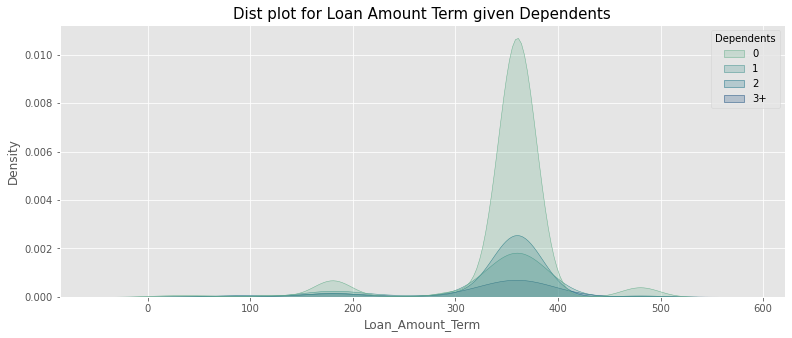

In [24]:
fig, ax= plt.subplots(nrows=1,ncols=1, figsize=(13,5))

sns.kdeplot(
        data=df,
        x='Loan_Amount_Term',
        hue='Dependents',
        fill=True,
        palette="crest");

ax.set_title('Dist plot for Loan Amount Term given Dependents', fontsize=15);

In [25]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(360)

<AxesSubplot:>

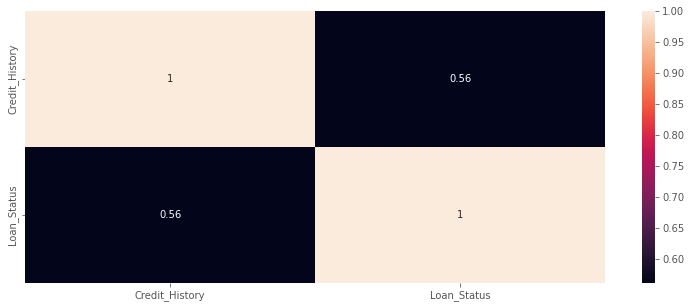

In [26]:
corr_df= df[['Credit_History','Loan_Status']]

corr_df['Loan_Status']= [1 if i == 'Y' else 0 for i in df['Loan_Status']]
cor= corr_df.corr()

fig, ax= plt.subplots(nrows=1,ncols=1, figsize=(13,5))
sns.heatmap(cor, annot=True)

In [27]:
df['Credit_History']= np.where(
    (df['Credit_History'].isnull() == True) & (df['Loan_Status'] == 'Y') ,1, df['Credit_History']
)

df['Credit_History']= np.where(
    df['Credit_History'].isnull() == True ,0, df['Credit_History']
)

In [28]:
df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]= np.ceil(
    df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]).astype('int64')

In [29]:
def change(df, col, sparse, value):
    df[col]= np.where(df[col] == sparse, value, df[col])

In [32]:
change(df,'Dependents','3+','3 or More Dependents')

change(df,'Loan_Amount_Term','360','30 YEARS')
change(df,'Loan_Amount_Term','120','10 YEARS')
change(df,'Loan_Amount_Term','240','20 YEARS')
change(df,'Loan_Amount_Term','180','15 YEARS')
change(df,'Loan_Amount_Term','60','5 YEARS')
change(df,'Loan_Amount_Term','300','25 YEARS')
change(df,'Loan_Amount_Term','480','40 YEARS')
change(df,'Loan_Amount_Term','36','3 YEARS')
change(df,'Loan_Amount_Term','84','7 YEARS')
change(df,'Loan_Amount_Term','12','1 YEAR')

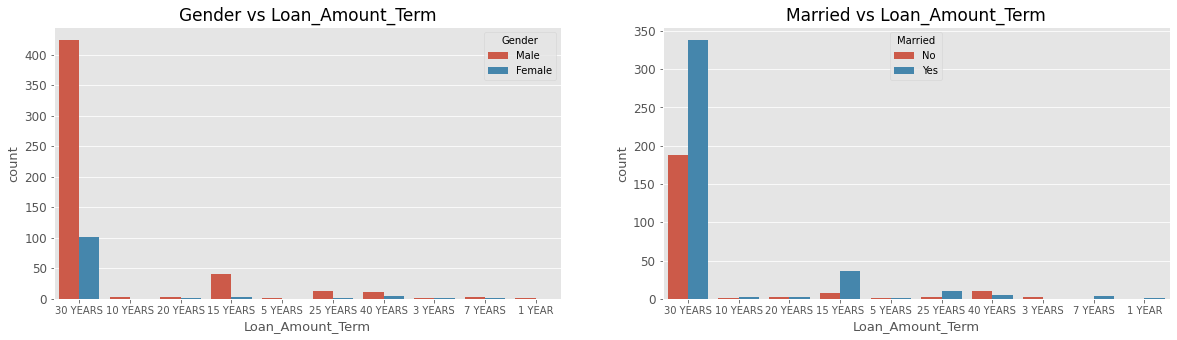

In [33]:
fig, ax= plt.subplots(1,2, figsize=(20,5))

def count_plot(ax, col, title, hue):
    
    global df
        
    sns.countplot(data=df, x=col, hue=hue, ax=ax)

    ax.set_title(title, fontsize=17)
    ax.set_ylabel('count',fontsize=13)
    ax.set_xlabel(col, fontsize=13)
    
#     ax.bar_label(ax.containers[0], fontsize=15)
    
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=12)
    
#     fig.tight_layout()
    
    
count_plot(ax[0], 'Loan_Amount_Term',
           'Gender vs Loan_Amount_Term','Gender')

count_plot(ax[1], 'Loan_Amount_Term',
           'Married vs Loan_Amount_Term','Married')

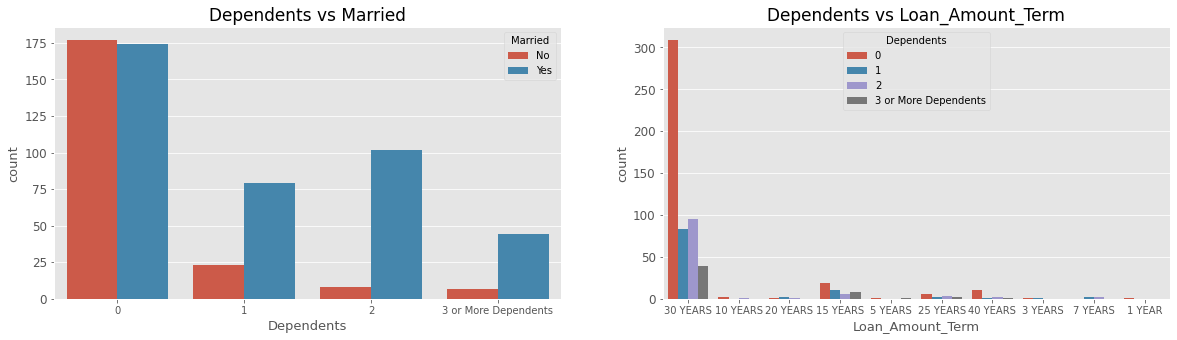

In [34]:
fig, ax= plt.subplots(1,2, figsize=(20,5))


count_plot(ax[0], 'Dependents',
           'Dependents vs Married','Married')

count_plot(ax[1], 'Loan_Amount_Term',
           'Dependents vs Loan_Amount_Term','Dependents')

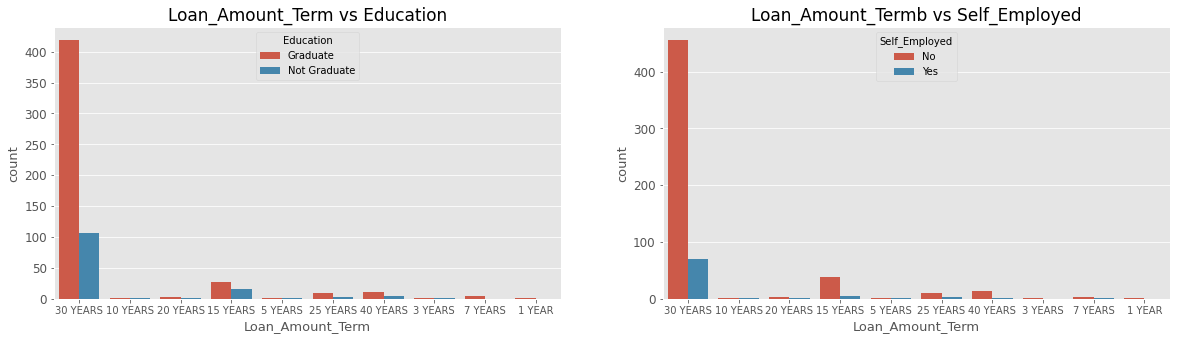

In [35]:
fig, ax= plt.subplots(1,2, figsize=(20,5))


count_plot(ax[0], 'Loan_Amount_Term',
           'Loan_Amount_Term vs Education','Education')

count_plot(ax[1], 'Loan_Amount_Term',
           'Loan_Amount_Termb vs Self_Employed','Self_Employed')

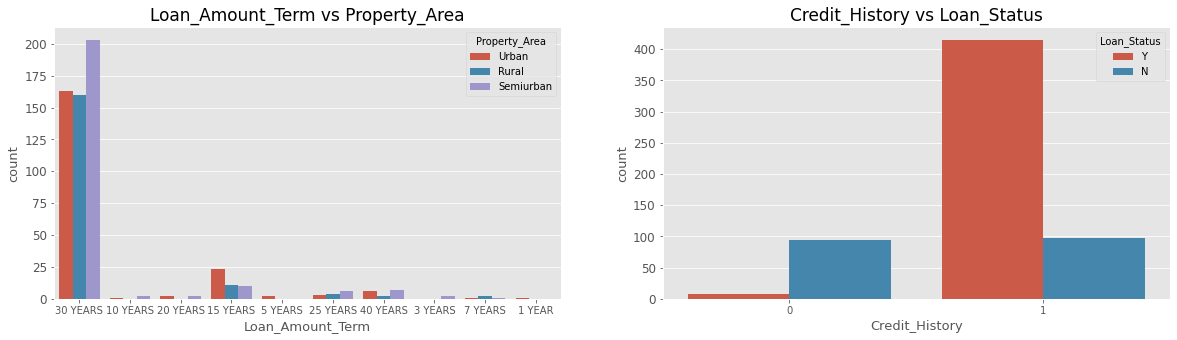

In [36]:
fig, ax= plt.subplots(1,2, figsize=(20,5))


count_plot(ax[0], 'Loan_Amount_Term',
           'Loan_Amount_Term vs Property_Area','Property_Area')

count_plot(ax[1], 'Credit_History',
           'Credit_History vs Loan_Status','Loan_Status')

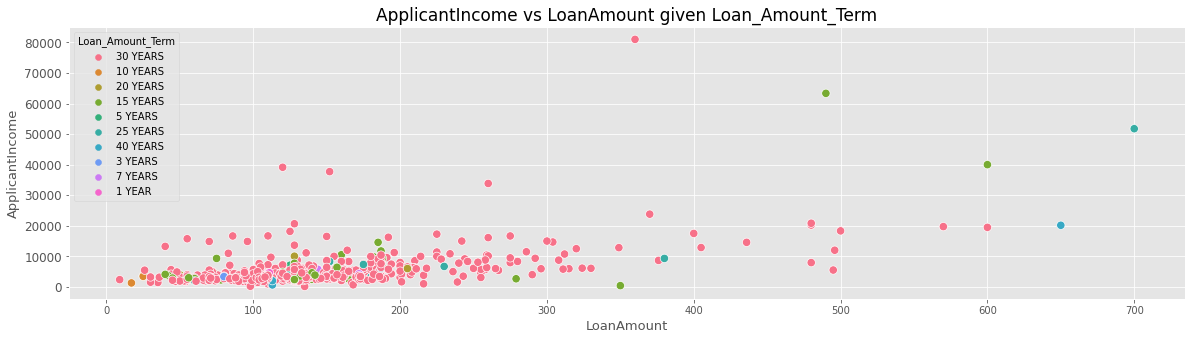

In [37]:
fig, ax= plt.subplots(1,1, figsize=(20,5))

def replot(ax, col, col2, title, hue):
    
    global df
        
    sns.scatterplot(data=df, x=col, y=col2, hue=hue, ax=ax, s=70)

    ax.set_title(title, fontsize=17)
    ax.set_ylabel(col2,fontsize=13)
    ax.set_xlabel(col, fontsize=13)
    
#     ax.bar_label(ax.containers[0], fontsize=15)
    
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=12)
    
#     fig.tight_layout()
    
    
replot(ax, 'LoanAmount','ApplicantIncome',
           'ApplicantIncome vs LoanAmount given Loan_Amount_Term','Loan_Amount_Term')

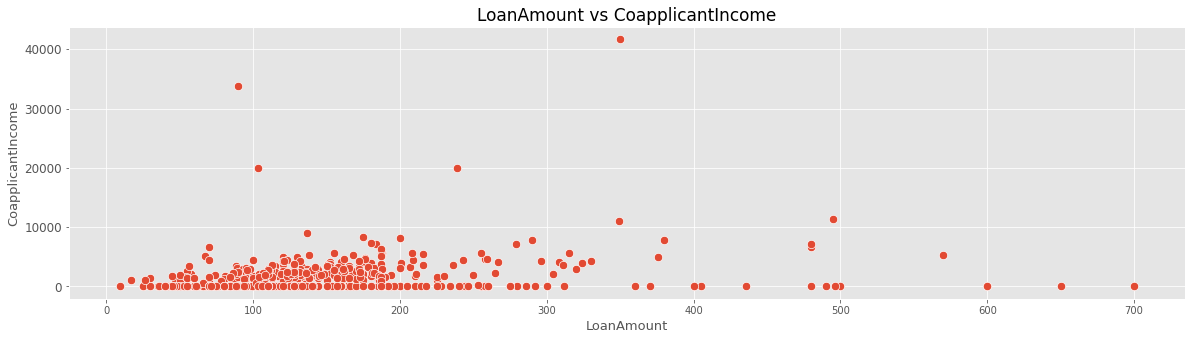

In [38]:
fig, ax= plt.subplots(1,1, figsize=(20,5))

replot(ax, 'LoanAmount','CoapplicantIncome',
           'LoanAmount vs CoapplicantIncome',None)

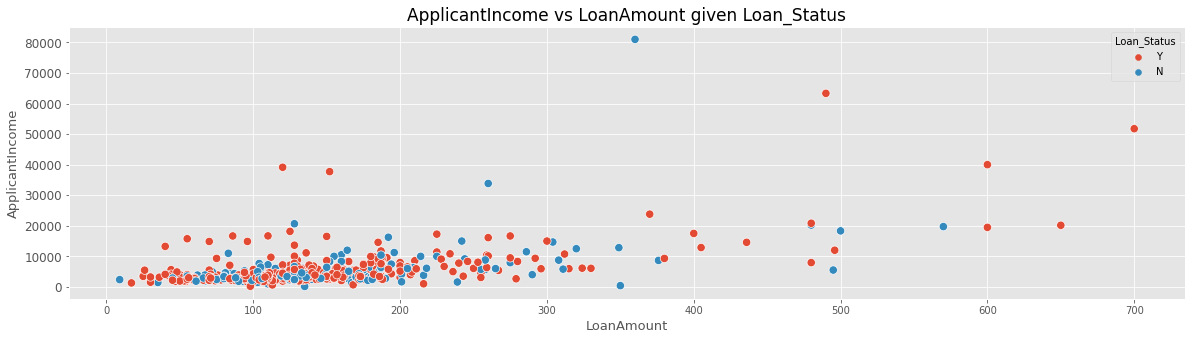

In [39]:
fig, ax= plt.subplots(1,1, figsize=(20,5))


replot(ax, 'LoanAmount','ApplicantIncome',
           'ApplicantIncome vs LoanAmount given Loan_Status','Loan_Status')

In [40]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [41]:
df['Loan_Status']=[1 if i == 'Y' else 0 for i in df['Loan_Status']]

In [42]:
df.drop('Loan_ID', axis=1, inplace=True)

In [43]:
x= df.loc[:,(df.columns != 'Loan_Status')]
y= df['Loan_Status']

x_train, x_test, y_train, y_test= train_test_split \
                                (x,y, test_size= 0.1, random_state=42, stratify=y)

In [44]:
# numeric_pipe= ([('scaler',StandardScaler())])
# categorical_pipe= ([('label',OneHotEncoder(drop='first'))])

numer_columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']
cat_columns= ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area']

# transformer= ColumnTransformer([('num',numeric_pipe,['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']),
#                                 ('cat',categorical_pipe,['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area'])])

transformer= make_column_transformer((StandardScaler(), numer_columns),
                                      (OneHotEncoder(drop='first'), cat_columns))

In [45]:
pipe_lo = Pipeline([('Transformer',transformer),
                    ('LR', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('Transformer',transformer),
                    ('DT',DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([('Transformer',transformer),
                    ('RF',RandomForestClassifier(random_state=42))])

pipe_knn = Pipeline([('Transformer',transformer),
                    ('KNN', KNeighborsClassifier())])

pipe_svm = Pipeline([('Transformer',transformer),
                     ('SVM', SVC(random_state=42))])

pipe_xgb = Pipeline([('Transformer',transformer),
                     ('XGB', XGBClassifier(random_state=42))])

pipe_sgd= Pipeline([('Transformer',transformer),
                    ('SGD',SGDClassifier())])

In [46]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [10,20,50,100,150,200,250,300]
learning_rates = [.1,.2,.3]
n_iters = [5, 10, 20, 50, 100, 1000]
loss = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                  'LR__C': param_range_fl,
                  'LR__solver': ['liblinear']}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                  'DT__min_samples_leaf': param_range,
                  'DT__max_depth': param_range,
                  'DT__min_samples_split': param_range[1:]}]

rf_param_grid = [{'RF__min_samples_leaf': param_range,
                  'RF__max_depth': param_range,
                  'RF__min_samples_split': param_range[1:]}]

knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                   'SVM__C': param_range}]

xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                   'XGB__max_depth': param_range,
                   'XGB__min_child_weight': param_range[:2],
                   'XGB__subsample': param_range_fl,
                   'XGB__n_estimators': n_estimators}]

sgd_param_grid = [{'SGD__loss':loss}]

In [47]:
lr_grid_search = GridSearchCV(estimator=pipe_lo,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=5)

knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=5)

svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=5)

xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=5)

sgd_grid_search = GridSearchCV(estimator=pipe_sgd,
        param_grid=sgd_param_grid,
        scoring='accuracy',
        cv=5)

In [48]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, 
         svm_grid_search, xgb_grid_search, sgd_grid_search]

for pipe in grids:
    pipe.fit(x_train,y_train)

Logistic Regression Train Accuracy: 0.8333333333333334
Logistic Regression Test Accuracy: 0.8225806451612904
ROC_AUC Score : 0.7252141982864138
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



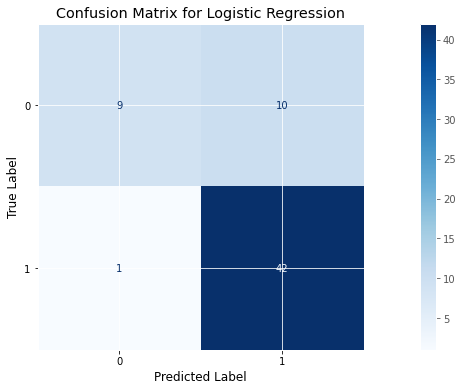

---------------------------------------------

Decision Trees Train Accuracy: 0.8315217391304348
Decision Trees Test Accuracy: 0.8225806451612904
ROC_AUC Score : 0.7252141982864138
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



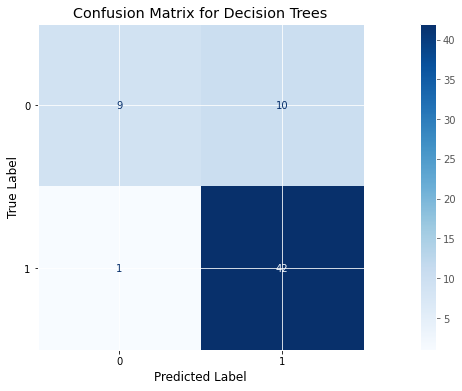

---------------------------------------------

Random Forest Train Accuracy: 0.6865942028985508
Random Forest Test Accuracy: 0.6935483870967742
ROC_AUC Score : 0.5
Random Forest Best Params: {'RF__max_depth': 1, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.69      1.00      0.82        43

    accuracy                           0.69        62
   macro avg       0.35      0.50      0.41        62
weighted avg       0.48      0.69      0.57        62



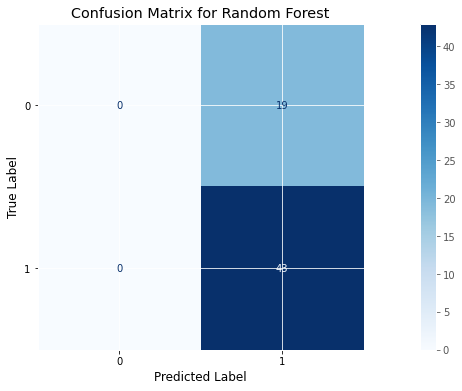

---------------------------------------------

K-Nearest Neighbors Train Accuracy: 1.0
K-Nearest Neighbors Test Accuracy: 0.7419354838709677
ROC_AUC Score : 0.7111383108935129
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}
Classification Report : 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.83      0.79      0.81        43

    accuracy                           0.74        62
   macro avg       0.70      0.71      0.70        62
weighted avg       0.75      0.74      0.75        62



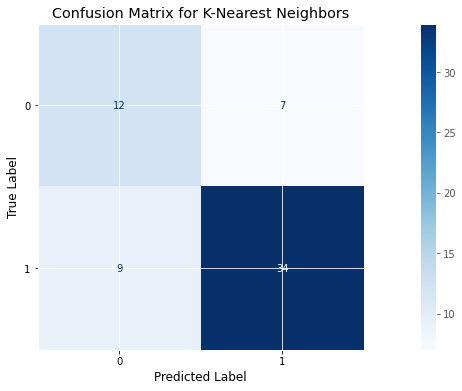

---------------------------------------------

Support Vector Machines Train Accuracy: 0.8351449275362319
Support Vector Machines Test Accuracy: 0.8225806451612904
ROC_AUC Score : 0.7252141982864138
Support Vector Machines Best Params: {'SVM__C': 1, 'SVM__kernel': 'linear'}
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



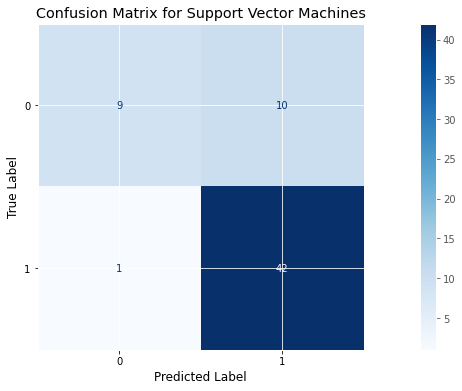

---------------------------------------------

XGBoost Train Accuracy: 0.8315217391304348
XGBoost Test Accuracy: 0.8225806451612904
ROC_AUC Score : 0.7252141982864138
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 1, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 10, 'XGB__subsample': 1.0}
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



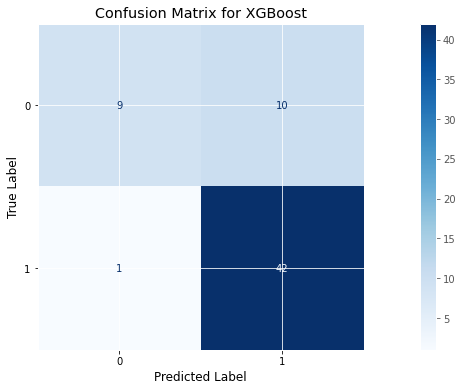

---------------------------------------------

SGDClassifie Train Accuracy: 0.769927536231884
SGDClassifie Test Accuracy: 0.7096774193548387
ROC_AUC Score : 0.6291309669522644
SGDClassifie Best Params: {'SGD__loss': 'hinge'}
Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.42      0.47        19
           1       0.77      0.84      0.80        43

    accuracy                           0.71        62
   macro avg       0.65      0.63      0.64        62
weighted avg       0.69      0.71      0.70        62



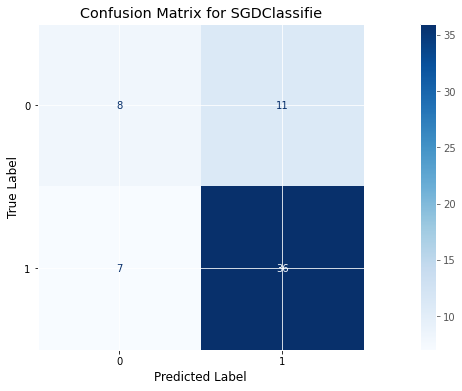

---------------------------------------------



In [49]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost', 6:'SGDClassifie'}

for i, model in enumerate(grids):
    print('{} Train Accuracy: {}'.format(grid_dict[i],
    model.score(x_train,y_train)))
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(x_test,y_test)))
    print('ROC_AUC Score : {}'.format(roc_auc_score(y_test, model.predict(x_test))))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))
    y_pred= model.predict(x_test)
    print('Classification Report : \n',classification_report(y_test, y_pred))
    
    matrix = plot_confusion_matrix(model, x_test, y_test, cmap= plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix for {}'.format(grid_dict[i]), color='black')
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    plt.tick_params(colors='black')
    plt.tick_params(colors='black')
    plt.show()
    print('---------------------------------------------\n')

In [50]:
import joblib

In [51]:
joblib.dump(svm_grid_search,'model_svm.joblip')

['model_svm.joblip']